In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from numpy.linalg import svd as usv
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df)

19999

In [ ]:
df.isnull().any().sum()
#there is no null value

0

In [ ]:
mnist = np.array(df.T)

In [ ]:
len(mnist[0])

19999

In [ ]:
#normalization function with z score formula input-mean.standard deviation
def normalization(arr):
  mean = np.mean(arr) 
  std = np.std(arr)
  z = []
  sub_z = []
  for j,i in enumerate(arr): 
    j += 1
    z_value = (i-mean)/std
    sub_z.append(int(z_value))
    if j % 19999 ==0:
      z.append(np.array(sub_z,dtype=int))
      sub_z = []
  return z

In [ ]:
#to make 19999,785 to single 19999*785,1
arr = []
for i in mnist:
  arr.extend(i)
print(len(arr))
mnist = pd.DataFrame(normalization(arr))

15699215


In [ ]:
mnist = mnist.T
mnist.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist.isnull().any().sum())


0


In [ ]:
mnist = np.array(mnist)
#Taking the mean of every row to adjust to the origin 
mnist_mean = np.mean(mnist,1,keepdims=True)
print(len(list(mnist_mean)))

19999


In [ ]:
#finding x.xT as we need to max the sum of 1/m(x.T*u)^2 after simplyfying to sum of u*x.xT*u.T
cov = np.cov(mnist.T)
print(cov)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#sometimes if dataset is of huge dimensional matrix then matrix multiplication would take more time
#to overcome we take svd of it in which v almost equal to cov matrix
u,s,v = usv(mnist,full_matrices=True)
print(v==cov)

[[False  True  True ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [ True False False ...  True  True  True]
 [ True False False ...  True  True  True]]


In [ ]:
eigenvalue,eigenvector = LA.eig(cov)
print(eigenvalue)


[ 1.96481587e+01  1.45807321e+01  1.28363965e+01  1.12155228e+01
  1.02868560e+01  8.85624459e+00  6.88150696e+00  6.19941123e+00
  5.84473500e+00  5.01593138e+00  4.65053921e+00  4.29219574e+00
  3.71253920e+00  3.67037500e+00  3.42836016e+00  3.18025201e+00
  2.93001452e+00  2.78608718e+00  2.65162595e+00  2.51314875e+00
  2.39845739e+00  2.24421003e+00  2.11730957e+00  2.06739434e+00
  2.00386199e+00  1.93230022e+00  1.85382456e+00  1.79787698e+00
  1.69421805e+00  1.59633653e+00  1.50409337e+00  1.49713447e+00
  1.41128536e+00  1.37961775e+00  1.33649852e+00  1.30636674e+00
  1.22625535e+00  1.15626829e+00  1.14564780e+00  1.11531978e+00
  1.07238382e+00  1.05273613e+00  1.01878443e+00  9.61328528e-01
  9.49656790e-01  9.10681975e-01  8.92528247e-01  8.65913785e-01
  8.26842439e-01  8.20190681e-01  7.98867188e-01  7.65574464e-01
  7.45358262e-01  7.31729906e-01  7.28714469e-01  6.96454793e-01
  6.80558672e-01  6.73313168e-01  6.60029486e-01  6.27654537e-01
  6.22565333e-01  6.13663

In [ ]:
#taking the 2(bcs of 2D output) highest eigenvalue 
max_eigenvalue = sorted(eigenvalue,reverse=True)[:2]


In [ ]:
#Transformation matrix having 2 eigen vectors of 2 highest eigen value
A = np.array([eigenvector[:,0],eigenvector[:,1]])
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
A.shape

(2, 785)

In [ ]:
#move the points to origin mnist-mnist_mean 
#projection of data points to our eigenvector
Y = np.matmul(A,(mnist-mnist_mean).T)
print(Y)

[[-6.07411299 -6.66623359 -4.89291881 ... -5.8431865  -0.77944256
  -3.92468093]
 [ 2.44067854 -5.61711194 -4.87773269 ... -1.01650954 -3.14621264
   3.91105294]]


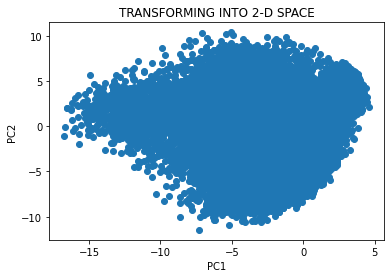

In [ ]:
#ploting a 19999,785 to 19999,2
plt.scatter(Y[0],Y[1])
plt.title('TRANSFORMING INTO 2-D SPACE')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(mnist)
Y = pca.transform(mnist)
Y = pd.DataFrame(Y)


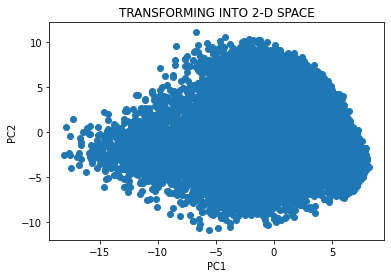

In [ ]:
plt.scatter(-Y[0],Y[1])
plt.title('TRANSFORMING INTO 2-D SPACE')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()